# Simple one agent model

A model which, at each time step, iterates over all combinations of a finite set of discrete speed increases/decreases and yaw rotations, which all take $\Delta T = 0.3$ s to execute, simulates the effects over a prediction interval $T_p = \Delta T$ and selects the action which maximises:

$V = -k_g v_g - \sum_i k_o / \tau_i - C_v v^2 - C_t \Delta \psi^2$,

where $v_g$ is the rate of change of the distance to the goal, $\tau_i$ time to collision with obstacle $i$ (infinite if no collision with $i$), $v$ is longitudinal speed, all three referring to the state after the prediction interval, and $\Delta \psi$ is the change in yaw rotation effectuated for the evaluated action; the rest above are model parameters.

In [15]:
# basic init
import numpy as np
import importlib
import one_agent
importlib.reload(one_agent)
x_goal = np.array([10, 10])

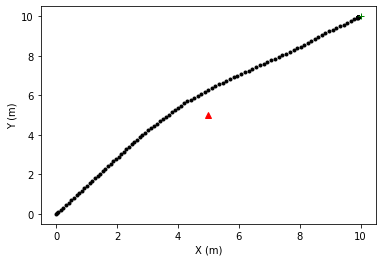

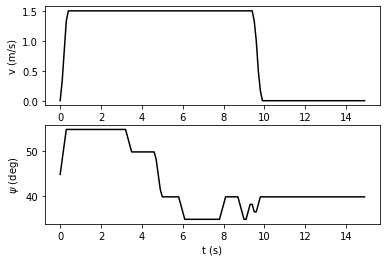

In [16]:
x_obstacles = np.array([[5, 5]])
one_agent.run_simulation(x_goal, x_obstacles)

Notice that the agent naturally decelerates to a stop once reaching the goal.

Now adding a second obstacle:

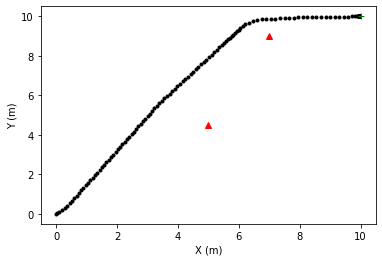

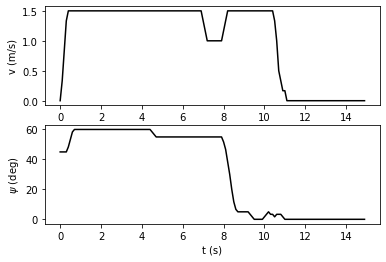

In [17]:
x_obstacles = np.array([[5, 4.5], [7, 9]])
one_agent.run_simulation(x_goal, x_obstacles)

Some interesting things above, like a preference to go around rather than between the obstacles, and a slight slowing down before turning around the second obstacle, in order not to overshoot.

Increasing the reward for making progress toward the goal gives a speed increase, and in this case makes the agent take a path between the obstacles:

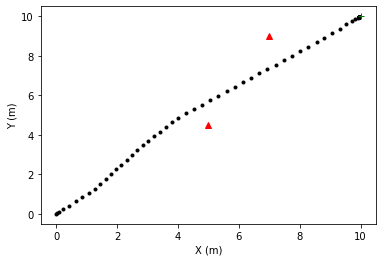

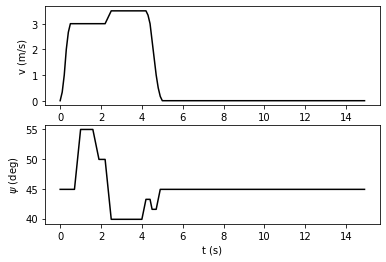

In [18]:
params = one_agent.get_default_params()
params["k_g"] = 2
one_agent.run_simulation(x_goal, x_obstacles, params)